In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats, scipy.special
import pandas as pd

## Load the data

In [7]:
ptable = pd.read_csv('raw_data.csv')

In [8]:
ptable

,Radius,Distance,Region
0,0.055488,142.837606,0
1,0.047447,133.536566,0
2,0.046957,147.059902,0
3,0.042353,142.121729,0
4,0.052495,134.190892,0
...,...,...,...
165,0.064011,196.551306,4
166,0.084666,201.259189,4
167,0.080907,197.207498,4
168,0.088905,194.455316,4


# Make a histogram of the widths

In [ ]:
# your code here

## Make a scatter plot to visualize the data (width vs distance)

Text(0, 0.5, 'Width [pc]')

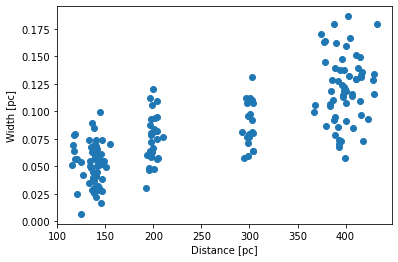

In [39]:
plt.scatter(ptable['Distance'],ptable.Width)
plt.xlabel('Distance [pc]')
plt.ylabel('Width [pc]')

### What do you notice about the data? 

## Test #1: Are the data correlated?

### Hint: Use the Pearson and Spearman correlation tests from scipy

In [ ]:
# your code here

### How do you interpret the result?

...

## The data are measurements of radii for different clouds, located at different distances from the Sun. Select the data from two clouds (region # 0 and  2)

# Test 2: Are the data consistent with the same parent distribution?

<div class="alert alert-block alert-success">
    
### But first: A primer on probabilities & distributions. 

##### Probability density functions and cumulative distribution functions

For a continuous random variable x, the corresponding probability density function (PDF) is defined as an integrable function f(x) that is non-negative, and with an area under the curve (integral) equal to 1, such that the probability of observing x in the interval (a,b) is given as:

$ P (\alpha < x < \beta) = \int_\alpha^\beta f(x) dx$

and recall the probability of x being *somewhere* is 1:

$ P(-\infty < x < \infty) = \int_{-\infty}^{+\infty} f(x) dx = 1 $

</div>

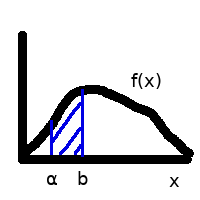

<div class="alert alert-block alert-success"> 
A cumulative distribution function (CDF) $F(x)$ is a monotonic, non-decreasing function in the support of $f(x)$, and evaluated as x, defines the probability that continuous random variable x will take a value less than or equal to b:

$P( x < b) = F(x) =  \int_{-\infty}^b f(x) dx$
</div>

### Examples of PDFs and their corresponding CDFs:

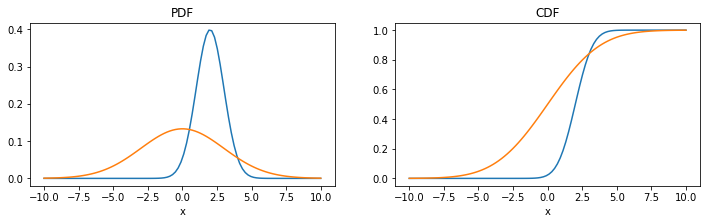

In [32]:
# define our random variable values
x = np.linspace(-10,10,100)
# Define two functions as PDF examples
sigma1 = 1.
mu1 = 2.
f1 = 1/sigma1/np.sqrt(2*np.pi) * np.exp(-(x - mu1)**2 / (2*sigma1**2))

sigma2 = 3
mu2 = 0.
f2 = 1/sigma2/np.sqrt(2*np.pi) * np.exp(-(x - mu2)**2 / (2*sigma2**2))

# and the corresponding CDF:
F1 = 1/2. * (1 + scipy.special.erf(((x - mu1)/ (sigma1 * np.sqrt(2.)) )) )
F2 = 1/2. * (1 + scipy.special.erf(((x - mu2)/ (sigma2 * np.sqrt(2.)) )) )

f, ax = plt.subplots(figsize = (12,3), nrows = 1, ncols = 2)
ax[0].plot(x,f1)
ax[1].plot(x,F1)

ax[0].plot(x,f2)
ax[1].plot(x,F2)
ax[0].set_title('PDF')
ax[1].set_title('CDF')

ax[0].set_xlabel('x')
ax[1].set_xlabel('x')

plt.show()

In [33]:
# Step 1: Plot a histogram of radii in each cloud. This can be loosely interpreted as a PDF (without the normalization)

## How can we tell if the data from cloud 1 and from cloud 2 have the same statistical properties? 


## The tools of statistics can't immediately tell us 'yes' or 'no', instead they can answer questions of the type: 'how likely is it that A is happening, as opposed to B?'

### These types of questions are tackled by *Hypothesis testing*.

<div class="alert alert-block alert-success">
    
## A primer on Hypotheses, testing them and p-values

#### Say we think our data is determined by a process which has a PDF f(x). We want to figure out whether f(x) may indeed be happening. So we make a *hypothesis*, let's say that f(x) were true. Are the data compatible with this hypothesis? 
#### To check this, we make a measurement $x_{obs}$:
</div>

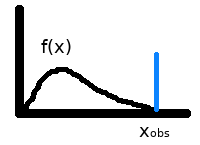

<div class="alert alert-block alert-success">
    
### Now we can ask: How likely is it that we would observe $x_{obs}$ if our expected process were operating?
#### The answer is given by the p-value:

$p = P(x \geq x_{obs} | H) $ *

- how likely it is that your data could have occurred if the null hypothesis, H , were true?
- the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct. 

For example: If your p value is 0.05, that means that 5% of the time you would see a result at least as extreme as the one you found if the null hypothesis was true.

<b>Basic idea: if there is only a very small probability to find data with even worse (or equal) compatibility, then H is “disfavoured by the data”.</b>  If the p-value is below a user-defined threshold α (e.g. 0.01) then H is rejected.
  
  
#### A general note on Philosophy of Science: 
 
The only way to gain new information is to reject a hypothesis. In Physics we can never be sure that a model/theory (hypothesis) is true. We can only test whether it is incompatible with the data. So our experiments are made to try and disprove models. 

If we can't disprove a theory, we are stuck with it. Progress comes from trying to prove yourself wrong! Not very intuitive is it?

</div>

* footnote: This definition refers to a one-sided p-value. Depending on the hypothesis, the f(x) and the data, you can also formulate a 2-sided p-value. E.g. if f(x) is a Gaussian centered on 0, a 2-sided p-value would check whether the data are more extreme than expected f(x) on both sides (negative and positive values).

## Let's formulate our question again: are the data from cloud 1 and cloud 2 just random draws from the same parent distribution?

In [46]:
# Step 2: Construct and plot CDF for each cloud

In [47]:
# Step 3: Compute max distance between the two CDFs

## If difference is big, the distributions are likely not the same. But how big is too big?

## Let's quantify this with a Monte Carlo sampling test.

In [48]:
# Draw random samples from each distribution.

In [50]:
# Calculation of the distance between these new CDFs

In [ ]:
# Repeat 1000 times

In [51]:
# Count how often the measured distance appears in this experiment.

## Congratulations! You've estimated your first p-value!

In [ ]:
## Scipy allows you to compute the p-value quickly with ks_2samp. Use this function to compare to your result.